In [49]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
random.seed(0)

np.random.seed(0)

torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

import os

os.environ['CUDNN_DETERMINISTIC'] = '1'
os.environ['CUDNN_BENCHMARK'] = '0'

In [50]:
data = pd.read_csv("raw_data.csv", delimiter=";")

In [51]:
data.head()

,Year,Transistors,Clock (MHz),Power Density (W/cm²),Cores
0,1971,2300,0.74,3.750000,1
1,1974,4500,2.00,3.900000,1
2,1976,6500,3.00,4.450000,1
3,1978,29000,5.00,5.666667,1
4,1979,29000,5.00,5.151515,1


In [52]:
data["Cores"].unique()

array([ 1,  2,  4,  6, 10, 12, 15,  8, 18, 14])

In [53]:
data[data['Cores']==2]

,Year,Transistors,Clock (MHz),Power Density (W/cm²),Cores
43,2005,230000000,3200.0,63.106796,2
44,2005,230000000,2800.0,46.116505,2
45,2005,230000000,3200.0,63.106796,2
47,2006,291000000,1867.0,45.454545,2
48,2006,167000000,2400.0,58.558559,2
49,2006,376000000,3730.0,80.246914,2
50,2006,376000000,3600.0,80.246914,2
51,2006,376000000,3400.0,58.641975,2
56,2007,291000000,1500.0,11.888112,2
57,2007,291000000,1666.0,24.475524,2


In [54]:
data.drop(["Cores","Clock (MHz)", "Power Density (W/cm²)"], axis=1, inplace = True)

In [55]:
data = data.groupby('Year').sum().reset_index()

In [56]:
data

,Year,Transistors
0,1971,2300
1,1974,4500
2,1976,6500
3,1978,29000
4,1979,29000
5,1982,134000
6,1985,275000
7,1989,1180000
8,1993,6200000
9,1994,3300000


int64 int64


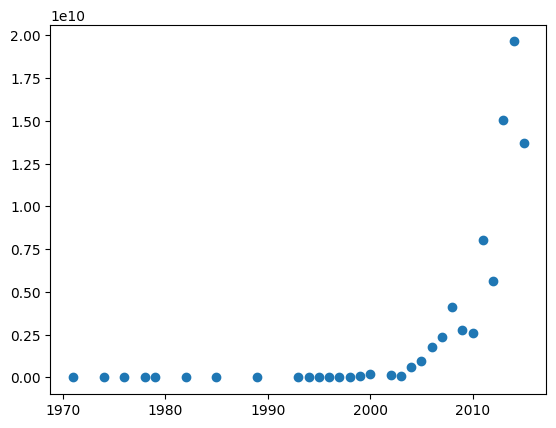

In [57]:
# 2 runs; first without standardisation; second with standardization
X = np.array(data["Year"])
y = np.array(data["Transistors"])
print(X.dtype, y.dtype)
plt.scatter(X,y)

In [58]:
X = torch.tensor(np.array(X.reshape(-1,1)).astype(np.float32))
y = torch.tensor(np.array(np.log(y).reshape(-1,1)).astype(np.float32))

In [59]:
lin_model = nn.Linear(1,1)

In [60]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(lin_model.parameters(), lr = 0.0001)

In [61]:
epoches = 5000
losses = []
for i in range(epoches):
  optimizer.zero_grad()
  out = lin_model(X)
  loss = criterion(out, y)
  losses.append(loss.item())
  loss.backward()
  optimizer.step()

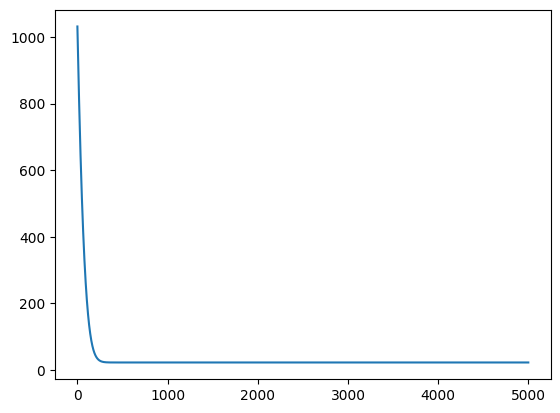

In [62]:
plt.plot(losses)

<ipython-input-63-c2023a8b4f88>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  plt.plot(X, lin_model(torch.tensor(X.reshape(-1,1))).detach().numpy(), color='r')


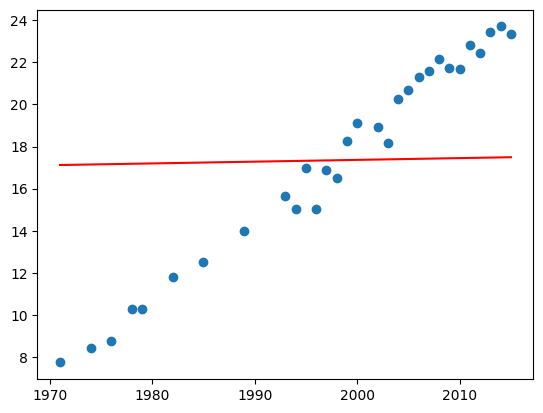

In [63]:
plt.scatter(X,y)
plt.plot(X, lin_model(torch.tensor(X.reshape(-1,1))).detach().numpy(), color='r')

In [64]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data['Transistors'] = np.log(data['Transistors'])
sc.fit(data)


StandardScaler()

In [65]:
X = sc.transform(data)[:,0]
y = sc.transform(data)[:,1]

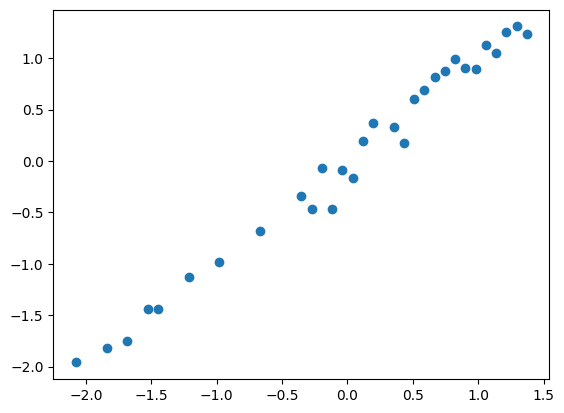

In [66]:
plt.scatter(X,y)

In [67]:
inputs = torch.tensor(X.reshape(-1,1).astype(np.float32))
targets = torch.tensor(y.reshape(-1,1).astype(np.float32))
epoches = 30000
losses = []
for i in range(epoches):
  optimizer.zero_grad()
  out = lin_model(inputs)
  loss = criterion(out, targets)
  losses.append(loss.item())
  loss.backward()
  optimizer.step()

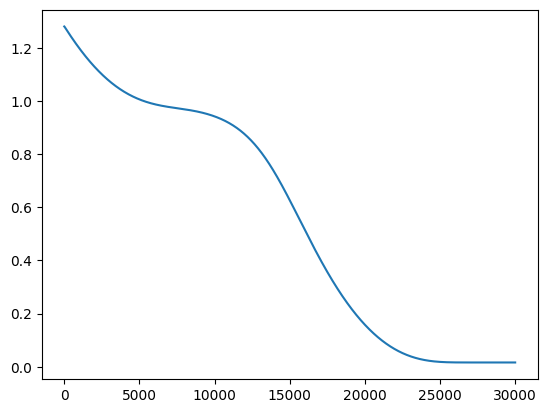

In [68]:
plt.plot(losses)

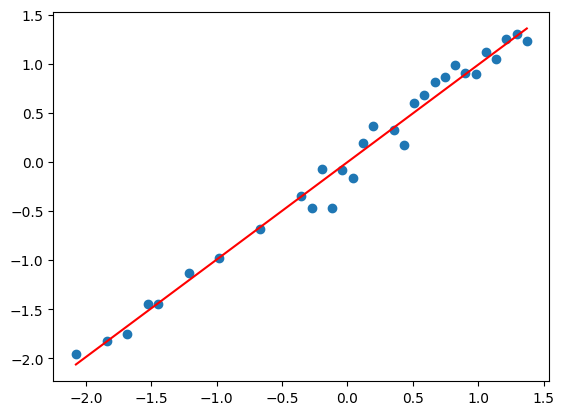

In [69]:
plt.plot(X, lin_model(inputs).detach().numpy(), color='r')
plt.scatter(X,y)